In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import acquire
from env import host, user, password
from pandas_profiling import ProfileReport

In [2]:
# function to contact database

def get_db_url(db_name):
    return f"mysql+pymysql://{user}:{password}@{host}/{db_name}"

In [3]:
# function to query db and return df

def wrangle_zillow():
    url = get_db_url(user, host, password, 'zillow')
    query = """
    SELECT
        bathroomcnt as bathrooms,
        bedroomcnt as bedrooms,
        calculatedfinishedsquarefeet as sqft,
        regionidzip as zip,
        taxvaluedollarcnt as home_value,
        taxamount as taxes,
        propertylandusetypeid as SFR,
        fips
    FROM
        predictions_2017
    JOIN
        properties_2017 USING(id)
    WHERE
        (transactiondate >= '2017-05-01' AND transactiondate <= '2017-06-30')
        AND bathroomcnt > 0
        AND bedroomcnt > 0
        AND calculatedfinishedsquarefeet > 0
        AND taxvaluedollarcnt > 0
        AND taxamount > 0
        AND propertylandusetypeid = '261'
        AND fips > 0
    ORDER BY fips;
    """
    zillow = pd.read_sql(query,url)
    return df

In [4]:
zillow = acquire.wrangle_zillow()

In [5]:
zillow.head()

bathrooms  bedrooms    sqft      zip  home_value     taxes    SFR    fips
0        2.0       3.0  1643.0  96420.0    209797.0   2570.29  261.0  6037.0
1        2.0       3.0  1345.0  96488.0    117160.0   1636.59  261.0  6037.0
2        4.0       4.0  4945.0  96159.0    638577.0   7545.37  261.0  6037.0
3        1.0       2.0   823.0  96090.0    143238.0   2693.72  261.0  6037.0
4        3.0       3.0  2269.0  96050.0    954293.0  11586.18  261.0  6037.0

In [6]:
zillow.describe()

bathrooms      bedrooms          sqft            zip    home_value  \
count  15956.000000  15956.000000  15956.000000   15947.000000  1.595600e+04   
mean       2.215844      3.253384   1837.197794   96505.022261  4.634078e+05   
std        1.026662      0.949643    984.838795    4177.315885  6.434229e+05   
min        1.000000      1.000000    320.000000   95982.000000  1.216800e+04   
25%        2.000000      3.000000   1233.000000   96152.000000  1.820338e+05   
50%        2.000000      3.000000   1592.000000   96336.000000  3.205150e+05   
75%        3.000000      4.000000   2164.000000   96531.000000  5.286050e+05   
max       20.000000     25.000000  26345.000000  399675.000000  1.912982e+07   

               taxes      SFR          fips  
count   15956.000000  15956.0  15956.000000  
mean     5681.839846    261.0   6044.487591  
std      7466.645847      0.0     17.283469  
min        49.180000    261.0   6037.000000  
25%      2496.027500    261.0   6037.000000  
50%      4065.150000    261.0   6037.000000  
75%      6409.490000    261.0   6037.000000  
max    228999.210000    261.0   6111.000000

In [7]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15956 entries, 0 to 15955
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bathrooms   15956 non-null  float64
 1   bedrooms    15956 non-null  float64
 2   sqft        15956 non-null  float64
 3   zip         15947 non-null  float64
 4   home_value  15956 non-null  float64
 5   taxes       15956 non-null  float64
 6   SFR         15956 non-null  float64
 7   fips        15956 non-null  float64
dtypes: float64(8)
memory usage: 997.4 KB


In [8]:
zillow.isna().sum()

bathrooms     0
bedrooms      0
sqft          0
zip           9
home_value    0
taxes         0
SFR           0
fips          0
dtype: int64

In [9]:
zillow = zillow.dropna()

In [10]:
zillow.isna().sum()

bathrooms     0
bedrooms      0
sqft          0
zip           0
home_value    0
taxes         0
SFR           0
fips          0
dtype: int64

In [11]:
zillow['bathrooms'] = zillow['bathrooms'].astype(int)

In [12]:
zillow['bedrooms'] = zillow['bedrooms'].astype(int)

In [13]:
zillow['sqft'] = zillow['sqft'].astype(int)

In [14]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15947 entries, 0 to 15955
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bathrooms   15947 non-null  int64  
 1   bedrooms    15947 non-null  int64  
 2   sqft        15947 non-null  int64  
 3   zip         15947 non-null  float64
 4   home_value  15947 non-null  float64
 5   taxes       15947 non-null  float64
 6   SFR         15947 non-null  float64
 7   fips        15947 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 1.1 MB


In [15]:
zillow['zip'] = zillow['zip'].astype(int)

In [16]:
zillow['home_value'] = zillow['home_value'].astype(int)

In [17]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15947 entries, 0 to 15955
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bathrooms   15947 non-null  int64  
 1   bedrooms    15947 non-null  int64  
 2   sqft        15947 non-null  int64  
 3   zip         15947 non-null  int64  
 4   home_value  15947 non-null  int64  
 5   taxes       15947 non-null  float64
 6   SFR         15947 non-null  float64
 7   fips        15947 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 1.1 MB


In [18]:
zillow.head()

bathrooms  bedrooms  sqft    zip  home_value     taxes    SFR    fips
0          2         3  1643  96420      209797   2570.29  261.0  6037.0
1          2         3  1345  96488      117160   1636.59  261.0  6037.0
2          4         4  4945  96159      638577   7545.37  261.0  6037.0
3          1         2   823  96090      143238   2693.72  261.0  6037.0
4          3         3  2269  96050      954293  11586.18  261.0  6037.0

In [19]:
zillow['SFR_property_code'] = zillow['SFR_property_code'].astype(int)

KeyError: 'SFR_property_code'

In [20]:
zillow['fips'] = zillow['fips'].astype(int)

In [21]:
zillow.head()

bathrooms  bedrooms  sqft    zip  home_value     taxes    SFR  fips
0          2         3  1643  96420      209797   2570.29  261.0  6037
1          2         3  1345  96488      117160   1636.59  261.0  6037
2          4         4  4945  96159      638577   7545.37  261.0  6037
3          1         2   823  96090      143238   2693.72  261.0  6037
4          3         3  2269  96050      954293  11586.18  261.0  6037

In [22]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15947 entries, 0 to 15955
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bathrooms   15947 non-null  int64  
 1   bedrooms    15947 non-null  int64  
 2   sqft        15947 non-null  int64  
 3   zip         15947 non-null  int64  
 4   home_value  15947 non-null  int64  
 5   taxes       15947 non-null  float64
 6   SFR         15947 non-null  float64
 7   fips        15947 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 1.1 MB


In [23]:
# run a pandas-profile on the df

profile = ProfileReport(zillow, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [24]:
profile

In [25]:
# now to calculate the tax rate

zillow['tax_rate'] = zillow['taxes'] / zillow['home_value']

In [26]:
zillow.head()

bathrooms  bedrooms  sqft    zip  home_value     taxes    SFR  fips  \
0          2         3  1643  96420      209797   2570.29  261.0  6037   
1          2         3  1345  96488      117160   1636.59  261.0  6037   
2          4         4  4945  96159      638577   7545.37  261.0  6037   
3          1         2   823  96090      143238   2693.72  261.0  6037   
4          3         3  2269  96050      954293  11586.18  261.0  6037   

   tax_rate  
0  0.012251  
1  0.013969  
2  0.011816  
3  0.018806  
4  0.012141

In [27]:
# now to add the county for the FIPS numbers provided from the db
# using this resource here
# https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=2&ved=2ahUKEwi27cfmn9noAhVNnKwKHSFhBNgQFjABegQIBRAB&url=https%3A%2F%2Fwww2.census.gov%2Fprograms-surveys%2Fpopest%2Fgeographies%2F2017%2Fall-geocodes-v2017.xlsx&usg=AOvVaw1o_RYNM9evsn9LJdV2iXC1
# it will download an excel file of the 2017 fips codes, as they can change annually

zillow['county_name'] = zillow['fips'].map({6037: 'Los Angeles', 6059: 'Orange', 6111: 'Ventura'})

In [28]:
zillow.sample(20)

bathrooms  bedrooms  sqft    zip  home_value     taxes    SFR  fips  \
1684           3         4  1934  96206      119524   1583.47  261.0  6037   
7608           2         4  1207  96291       57683    999.68  261.0  6037   
6768           1         3   999  96273      517766   6192.56  261.0  6037   
12978          2         3  1352  96996      586000   5984.62  261.0  6059   
7885           2         3  1908  96122      157966   2366.34  261.0  6037   
3902           1         2   720  96023      254470   3136.81  261.0  6037   
681            4         5  3024  96355      541818   6704.72  261.0  6037   
12768          3         4  3565  96987     1355000  13659.52  261.0  6059   
6199           2         2  1043  96229      192484   2728.75  261.0  6037   
13085          2         4  1492  96967       80134   1131.96  261.0  6059   
2145           1         2  1158  96193       37431    787.63  261.0  6037   
15407          2         3  1163  97089      262142   2794.58  261.0  6111   
13577          2         4  1528  97023      402569   4851.14  261.0  6059   
15348          2         4  1908  96351      528120   5578.22  261.0  6111   
9246           1         2   838  96045      747655   8994.08  261.0  6037   
6210           2         3  1464  96101      234746   2970.30  261.0  6037   
7833           3         3  3099  96494      211488   2697.71  261.0  6037   
6123           1         2  1408  96173       71942   1274.44  261.0  6037   
1769           1         3  1304  96137       97532   1549.67  261.0  6037   
1145           2         2  1218  96029      117150   1573.28  261.0  6037   

       tax_rate  county_name  
1684   0.013248  Los Angeles  
7608   0.017331  Los Angeles  
6768   0.011960  Los Angeles  
12978  0.010213       Orange  
7885   0.014980  Los Angeles  
3902   0.012327  Los Angeles  
681    0.012374  Los Angeles  
12768  0.010081       Orange  
6199   0.014177  Los Angeles  
13085  0.014126       Orange  
2145   0.021042  Los Angeles  
15407  0.010661      Ventura  
13577  0.012050       Orange  
15348  0.010562      Ventura  
9246   0.012030  Los Angeles  
6210   0.012653  Los Angeles  
7833   0.012756  Los Angeles  
6123   0.017715  Los Angeles  
1769   0.015889  Los Angeles  
1145   0.013430  Los Angeles

In [29]:
# now that the df is set, we can save it as a CSV to make working with the data easier

# zillow.to_csv('zillow.csv')

# actually can't get this to work, so I'm moving on

In [30]:
zillow.shape

(15947, 10)

In [31]:
# Create Distributions of the Tax Rates by County:

# Using the above resource we found a breakdown of fips numbers form 2017
# with this information we know all the counties are in California

# Below is a breakdown of the county representation in our data, and the corresponding tax rates and distribution.

county_distribution = pd.DataFrame(zillow.groupby('county_name').county_name.count())
county_distribution.columns = ['count']

In [32]:
county_distribution

count
county_name       
Los Angeles  12382
Orange        2778
Ventura        787

In [39]:
county_distribution['frequency'] = zillow['county_name'].value_counts(normalize=True)

In [40]:
county_distribution

count  frequency
county_name                  
Los Angeles  12382   0.776447
Orange        2778   0.174202
Ventura        787   0.049351

In [42]:
county_distribution['percentage'] = round(county_distribution['frequency'] * 100)

In [43]:
county_distribution

count  frequency  percentage
county_name                              
Los Angeles  12382   0.776447        78.0
Orange        2778   0.174202        17.0
Ventura        787   0.049351         5.0

In [44]:
#  looked at the count of properties in each county, and my df is made up of 78% Los Angeles County 
# properties, 17% Orange County, and 5% Ventura County.

In [65]:
county_median_tax_rate = pd.DataFrame(round(zillow.groupby('county_name').tax_rate.median(), 3) * 100)
county_median_tax_rate.columns = ['tax_rate']

In [66]:
county_median_tax_rate

tax_rate
county_name          
Los Angeles       1.3
Orange            1.2
Ventura           1.1

In [67]:
# regarding tax rates, it seems that LA county has the high tax rate, but there isn't
# too much of a difference between the rates

In [68]:
# lets visualize this data
los_angeles_tax_dist = zillow[zillow.county_name == "Los Angeles"].tax_rate
orange_tax_dist = zillow[zillow.county_name == "Orange"].tax_rate
ventura_tax_dist = zillow[zillow.county_name == "Ventura"].tax_rate

Text(0.5, 1.0, '2017 Tax Distribution for Los Angeles County')

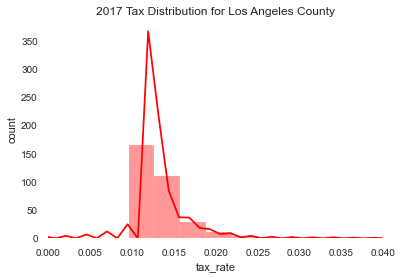

In [81]:
sns.distplot(los_angeles_tax_dist, color = 'Red')
plt.xlim(0, 0.04)
plt.ylabel('count')
plt.title('2017 Tax Distribution for Los Angeles County')

Text(0.5, 1.0, '2017 Tax Distribution for Orange County')

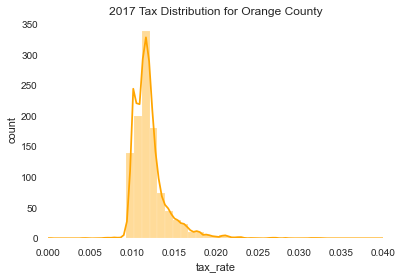

In [82]:
sns.distplot(orange_tax_dist, color = 'Orange')
plt.xlim(0, 0.04)
plt.ylabel('count')
plt.title('2017 Tax Distribution for Orange County')

Text(0.5, 1.0, '2017 Tax Distribution for Orange County')

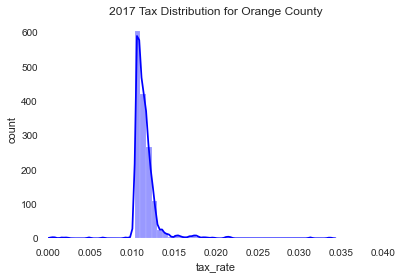

In [83]:
sns.distplot(ventura_tax_dist, color = 'Blue')
plt.xlim(0, 0.04)
plt.ylabel('count')
plt.title('2017 Tax Distribution for Orange County')

### Data dictionary

calculatedfinishedsquarefeet - Used for sqft as it had the most consistent vales and fewest nulls. The few nulls that were left were excluded from the data as they were not significant enough in size to hurt our data.
bedroomcnt - Used for bedrooms over other available fields as it was the most consistently available field without nulls or zeros.
bathroomcnt - Used for bedrooms over other available fields as it was the most consistently available field without nulls or zeros.
Additionally houses with zero bedroom or bathrooms were excluded as these were determined to be eroneous with our dataset of single family residenial homes. Null tax values were also excluded. The data lost with these exclusions was minimal.